**Install the Kaggle library**

In [ ]:
! pip install kaggle

**Make a directory named “.kaggle”**

In [ ]:
! mkdir ~/.kaggle

**Copy the “kaggle.json” into this new directory**

In [ ]:
! cp kaggle.json ~/.kaggle/

**Allocate the required permission for this file**

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

**Now, ready to download datasets from Kaggle**

In [ ]:
! kaggle datasets download kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [00:19<00:00, 89.8MB/s]
100% 1.98G/1.98G [00:19<00:00, 110MB/s] 


**In case you get a dataset with a zip extension, you can simply use the unzip command of Linux to extract the data:**

In [ ]:
! unzip fruit-and-vegetable-image-recognition.zip

Archive:  fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  
  inflati

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf


**Create a list with the filepaths for training and testing**

In [ ]:
train_dir = Path('/content/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

def proc_img(filepath):
    """Create a DataFrame with the filepath and the labels of the pictures"""

    labels = [str( filepath[i] ).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

#Concatenate filepaths and labels. Shuffle the DataFrame and reset index
    df = pd.concat([filepath, labels], axis=1)
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df


**Created DataFrame fro training and testing with the filepath and the labels of the pictures**

In [ ]:
train_df = proc_img(train_filepaths)
test_df = proc_img(test_filepaths)
val_df = proc_img(val_filepaths)

**Display the info of training dataset**

In [ ]:
print('Training set\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Total Labels: {train_df.Label.unique()}')

Training set

Number of pictures: 2780

Number of different labels: 36

Total Labels: ['pomegranate' 'raddish' 'bell pepper' 'potato' 'soy beans' 'kiwi' 'pear'
 'spinach' 'jalepeno' 'onion' 'eggplant' 'cucumber' 'sweetcorn' 'mango'
 'carrot' 'capsicum' 'watermelon' 'pineapple' 'apple' 'turnip' 'corn'
 'lettuce' 'tomato' 'chilli pepper' 'ginger' 'cabbage' 'cauliflower'
 'garlic' 'paprika' 'sweetpotato' 'lemon' 'grapes' 'beetroot' 'orange'
 'banana' 'peas']


**The DataFrame with the filepaths in one column and the labels in the other one**

In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/train/pomegranate/Image_46.jpg,pomegranate
1,/content/train/raddish/Image_67.jpg,raddish
2,/content/train/bell pepper/Image_89.jpg,bell pepper
3,/content/train/potato/Image_76.jpg,potato
4,/content/train/soy beans/Image_68.jpg,soy beans


**Create a DataFrame with one Label of each category**

In [ ]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

**Display some pictures of the dataset**

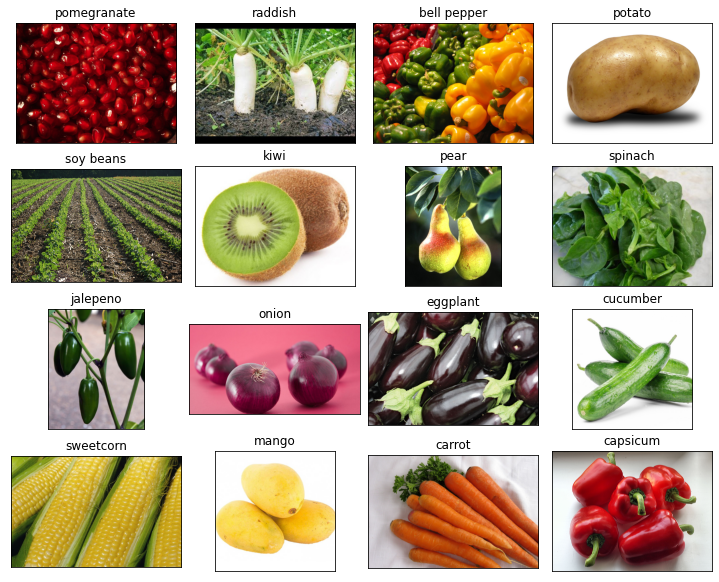

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


**Load the pretained model**

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


87/87 [==============================] - 213s 2s/step - loss: 1.7220 - accuracy: 0.5417 - val_loss: 0.4461 - val_accuracy: 0.8653
Epoch 2/5
87/87 [==============================] - 194s 2s/step - loss: 0.5601 - accuracy: 0.8299 - val_loss: 0.2933 - val_accuracy: 0.9162
Epoch 3/5
87/87 [==============================] - 194s 2s/step - loss: 0.3545 - accuracy: 0.8845 - val_loss: 0.2631 - val_accuracy: 0.9311
Epoch 4/5
87/87 [==============================] - 195s 2s/step - loss: 0.2169 - accuracy: 0.9406 - val_loss: 0.2277 - val_accuracy: 0.9311
Epoch 5/5
87/87 [==============================] - 195s 2s/step - loss: 0.1402 - accuracy: 0.9586 - val_loss: 0.1805 - val_accuracy: 0.9611


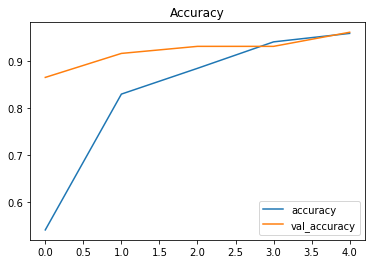

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

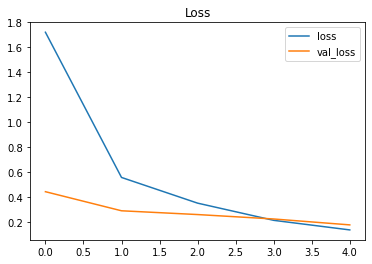

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

**Predict the label of the test_images**

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


**Map the label**

In [ ]:
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 96.11%


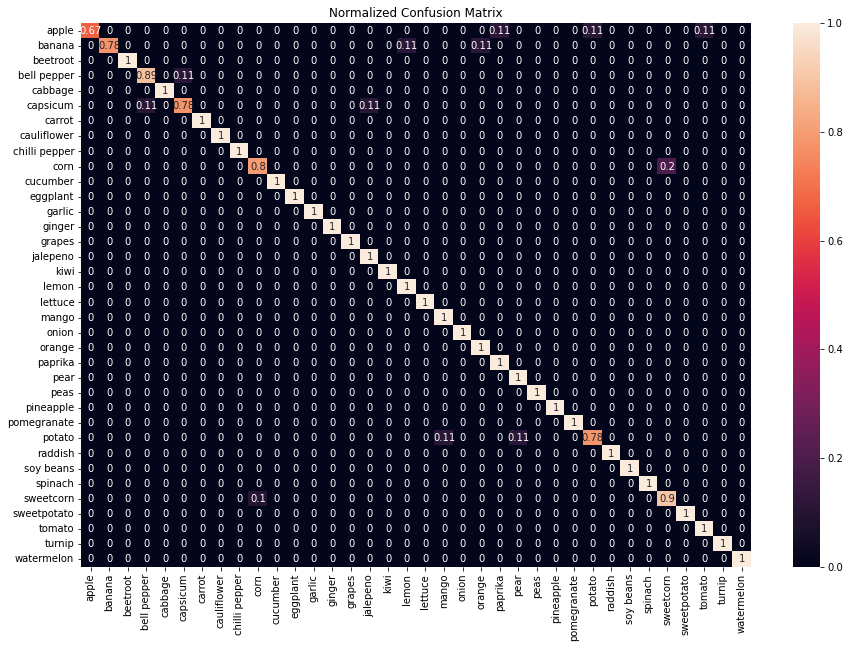

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

**Display some pictures of the dataset with their labels and the predictions**

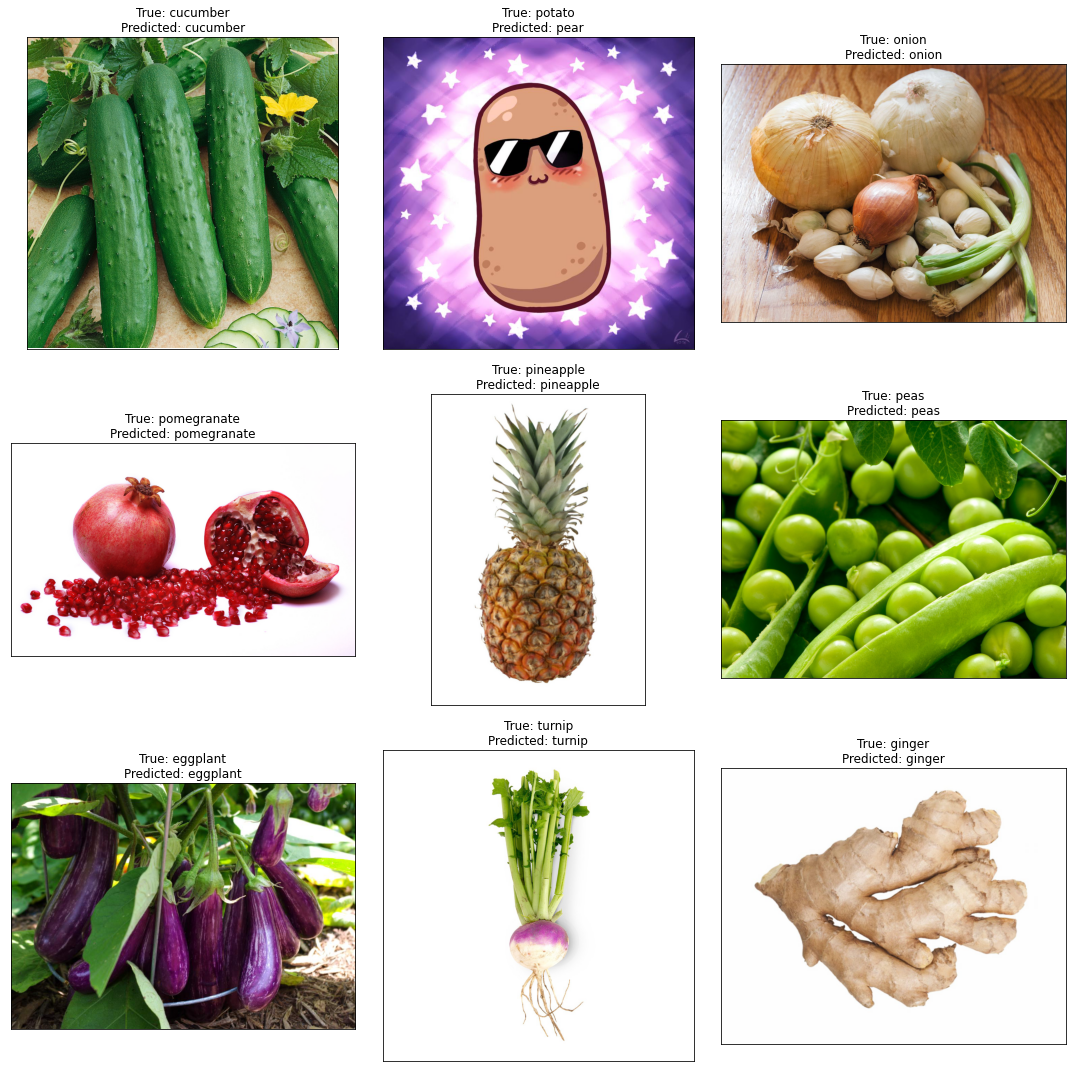

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

Saving model in .pkl file 

In [ ]:
model.save('FV.h5')